## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
boston = datasets.load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [73]:
regr_coef = regr.coef_
print(regr_coef)

[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
 -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
  2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
 -4.57723846e-01]


In [72]:
regr_mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f"
      % regr_mse)

Mean squared error: 25.42


## LASSO

In [81]:
lasso = linear_model.Lasso(alpha = 1)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

In [82]:
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.06494981  0.04581458 -0.          0.         -0.          1.18140024
  0.01109101 -0.73695809  0.23350042 -0.01551065 -0.69270805  0.00763157
 -0.6927848 ]


In [83]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 28.95


## RIDGE

In [84]:
ridge = linear_model.Ridge(alpha = 1)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

In [85]:
ridge_coef = ridge.coef_
print(ridge.coef_)

[-1.12499445e-01  4.79562332e-02 -2.40438147e-02  2.96199458e+00
 -9.33966118e+00  3.93079015e+00 -1.73821202e-02 -1.43347691e+00
  2.75239392e-01 -1.38920708e-02 -8.31116943e-01  9.15637729e-03
 -4.66460539e-01]


In [86]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.74


## Alpha Comparison between Lasso, Ridge

In [31]:
alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]

lasso_list = []
ridge_list = []
for alpha_val in alpha_list: 
    lasso = linear_model.Lasso(alpha = alpha_val)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    lasso_list.append(mean_squared_error(y_test, y_pred))
    
    ridge = linear_model.Ridge(alpha = alpha_val)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    ridge_list.append(mean_squared_error(y_test, y_pred))

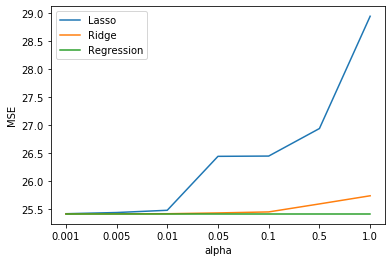

In [69]:
index = list(range(len(alpha_list)))
regr_list = [regr_mse] * len(alpha_list)

plots = plt.plot(index, lasso_list, index, ridge_list, regr_list)
plt.legend(plots, ('Lasso', "Ridge", "Regression"))
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.xticks(index, alpha_list)
plt.show()

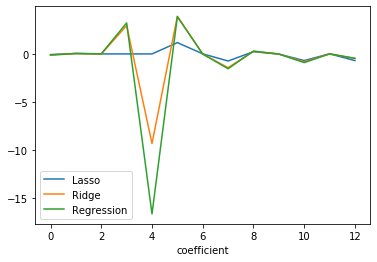

In [87]:
coef_index = list(range(len(regr_coef)))

plots = plt.plot(coef_index, lasso_coef, coef_index, ridge_coef, regr_coef)
plt.legend(plots, ('Lasso', "Ridge", "Regression"))
plt.xlabel("coefficient")
plt.show()